In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
import seaborn as sns

# Laden der Daten

In [2]:
#Datum wird in der Einheit "timestamp" geladen -> Umwandlung extern in Powershell vorgenommen
power_timestamps = pd.read_csv("power_outputedit_timestamps.csv", sep=",", usecols=(0,1))
rain_timestamps = pd.read_csv("rainedit_timestamps.csv", sep=",", usecols=(0,1))
temp_timestamps = pd.read_csv("temperaturesedit_timestamps.csv", sep=",", usecols=(0,1))

#Zusammenführen der Daten in einem Dataframe
jointFrame_timestamps = pd.merge(power_timestamps, rain_timestamps, how="outer", on="timestamp")
jointFrame_timestamps_2 = pd.merge(jointFrame_timestamps, temp_timestamps, how="outer", on="timestamp")
print(jointFrame_timestamps_2)

#NaNs werden mit 0en gefüllt
jointFrame_timestamps_2["power"] = jointFrame_timestamps_2["power"].fillna(0).astype(float)
jointFrame_timestamps_2["rain"] = jointFrame_timestamps_2["rain"].fillna(0).astype(float)
jointFrame_timestamps_2["temperature"] = jointFrame_timestamps_2["temperature"].fillna(0).astype(float)
print(jointFrame_timestamps_2)

        timestamp  power  rain  temperature
0      1561939800    0.0   NaN          NaN
1      1561940400    0.0   NaN          NaN
2      1561941000    0.0   NaN          NaN
3      1561941600    0.0   NaN          NaN
4      1561942200    0.0   NaN          NaN
...           ...    ...   ...          ...
17854  1627773900    NaN   0.0          NaN
17855  1627775700    NaN   0.0          NaN
17856  1561939200    NaN   NaN         21.0
17857  1593561600    NaN   NaN         21.6
17858  1625097600    NaN   NaN         22.3

[17859 rows x 4 columns]
        timestamp  power  rain  temperature
0      1561939800    0.0   0.0          0.0
1      1561940400    0.0   0.0          0.0
2      1561941000    0.0   0.0          0.0
3      1561941600    0.0   0.0          0.0
4      1561942200    0.0   0.0          0.0
...           ...    ...   ...          ...
17854  1627773900    0.0   0.0          0.0
17855  1627775700    0.0   0.0          0.0
17856  1561939200    0.0   0.0         21.0
17857 

# Daten plotten

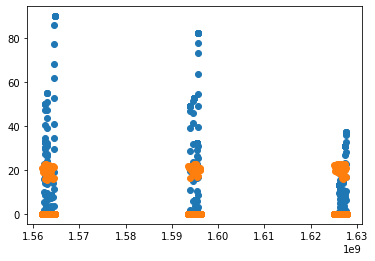

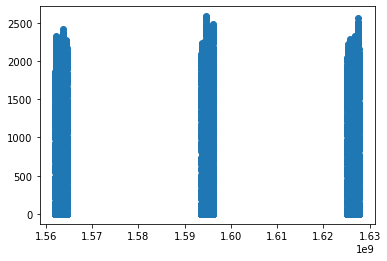

In [3]:
#Definition x,y und z Werte
xpoints=jointFrame_timestamps_2["timestamp"]
ypoints=jointFrame_timestamps_2["rain"]
zpoints=jointFrame_timestamps_2["temperature"]
apoints=jointFrame_timestamps_2["power"]

#Plotten
plt.scatter(xpoints, ypoints)
plt.scatter(xpoints, zpoints)
plt.show()
plt.scatter(xpoints, apoints)
plt.show()

Erklärung: Die Plotts zeigen den Power-Output, den Regen und die Temperaturen für die Jahre 2019-2021.

# Statistiken für einen Tag

In [4]:
#Laden der Daten in folgendem Datumsformat yyyy-mm-dd hh:mm:ss
power = pd.read_csv("power_output.csv", sep=",", usecols=(0,1))
rain = pd.read_csv("rainedit.csv", sep=",", usecols=(0,1))
temp = pd.read_csv("C:temperatures.csv", sep=",", usecols=(0,1))
print('\npower\n',power)
print('\nrain\n', rain)
print('\ntemp\n', temp)
#Formatierung Power-Datei

#Datum von Timestamp getrennt und Timestamp aus Df entfernt
power_splitted = power["timestamp"].str.split(" ", n=1, expand=True)
power_splitted = power_splitted.drop([1], axis =1)
print('\nDf power nur mit timestamp\n',power_splitted)

#1. Spalte der power Tabelle entfernt
power = power.drop(['timestamp'], axis =1)
print('\npower\n',power)

#Zusammenführen des Datum Df und des Regen Df in einen Df
power = pd.merge(power_splitted, power, how="left", left_index=True, right_index=True)
power = power.rename(columns={0:'date'})
print('\npower_neu\n',power)

#mit Groupby Daten nach Tagen sortieren und mit apply die Summenfunktion auf die Power-Daten anwenden
power = power.groupby(['date']).apply(np.sum, axis=1)
print('\npower nach groupby\n',power)

#Formatierung Rain-Datei

#Entfernen des Stunden:Minuten:Sekunden Ausdrucks aus dem Df
rain_splitted = rain["timestamp"].str.split(" ", n=1, expand=True)
rain_splitted = rain_splitted.drop([1], axis =1)
print('\nrain_splitted\n', rain_splitted)

#Datum aus Tabelle entfernt 
rain = rain.drop(['timestamp'], axis =1)
print('\nrain\n',rain)

#Zusammenführen des Datum Df und des Regen Df in einen Df
rain = pd.merge(rain_splitted, rain, how="left", left_index=True, right_index=True)
rain = rain.rename(columns={0:'date'})
print('\nrain\n',rain)

#mit Groupby Daten nach Tagen sortieren und mit apply die Summenfunktion auf die raindaten anwenden
rain = rain.groupby(['date']).apply(np.sum, axis=1)
print('\nrain_nach_groupbyn',rain)

#Listenelemente sind der Regen in mm/Tag
rain_list_2019=[]
rain_list_2020=[]
rain_list_2021=[]

for i in range (1,10):
    rain_list_2019.append(round(sum(rain.loc[f'2019-07-0{i}'])))
    rain_list_2020.append(round(sum(rain.loc[f'2020-07-0{i}'])))
    rain_list_2021.append(round(sum(rain.loc[f'2021-07-0{i}'])))
for j in range (10,32):
    rain_list_2019.append(round(sum(rain.loc[f'2019-07-{j}'])))
    rain_list_2020.append(round(sum(rain.loc[f'2020-07-{j}'])))
    rain_list_2021.append(round(sum(rain.loc[f'2021-07-{j}'])))
print('\nrain_lists\n',rain_list_2019,'\n', rain_list_2020,'\n', rain_list_2021,'\n')

#Problem mit append: 406.8 ist die Summe des Regens für rain_01_2019, jedoch wird 407 in die Liste geschrieben!
#-> für vernachlässigbar erachtet!

#listen rain_day_20** geben an, ob es ein Regentag war oder nicht (1 = Regentag)
rain_day_2019=[]
rain_day_2020=[]
rain_day_2021=[]

#num_... geben an, wie viele Regentage es in diesem Jahr gab
num_raindays_juli19=0
num_raindays_juli20=0
num_raindays_juli21=0
for h in range(31):
    if rain_list_2019[h]==0:
        rain_day_2019.append(0)
    else: 
        rain_day_2019.append(1)
        num_raindays_juli19=num_raindays_juli19+1
        
    if rain_list_2020[h]==0:
        rain_day_2020.append(0)
    else: 
        rain_day_2020.append(1)
        num_raindays_juli20=num_raindays_juli20+1
        
    if rain_list_2021[h]==0:
        rain_day_2021.append(0)
    else: 
        rain_day_2021.append(1)
        num_raindays_juli21=num_raindays_juli21+1
print('\nrain_day_19,20,21\n', rain_day_2019, len(rain_day_2019),'\n', rain_day_2020, len(rain_day_2020),'\n', rain_day_2021, len(rain_day_2021))
print(f'\nrainy days in summer 2019, 2020, 2021\nraindays_19: {num_raindays_juli19}\nraindays_20: {num_raindays_juli20}\nraindays_21: {num_raindays_juli21}')
print(f'\n sunny days in summer 2019, 2020, 2021\nsunnydays_19: {31-num_raindays_juli19}\nsunnydays_20: {31-num_raindays_juli20}\nsunnydays_21: {31-num_raindays_juli21}')

#Durchschnittswert der Temperatur an einem Regentag/Sonnentag
rain_day_192021=rain_day_2019+rain_day_2020+rain_day_2021
print('\n', len(rain_day_192021))
i=0 
temp_0=temp.copy(deep=True)
temp_1=temp.copy(deep=True)
for i in range (93):
    if rain_day_192021[i]==0:
        temp_0=temp_0.drop([i],axis=0)
    i=i+1
print('\nTemperaturliste an Regentagen\n', temp_0)
for i in range (93):
    if rain_day_192021[i]==1:
        temp_1=temp_1.drop([i],axis=0)
    i=i+1
print('\nTemperaturliste an Sonnentagen\n', temp_1)


power
                  timestamp   power[W]
0      2019-07-01 00:10:00          0
1      2019-07-01 00:20:00          0
2      2019-07-01 00:30:00          0
3      2019-07-01 00:40:00          0
4      2019-07-01 00:50:00          0
...                    ...        ...
13387  2021-07-31 23:20:00          0
13388  2021-07-31 23:30:00          0
13389  2021-07-31 23:40:00          0
13390  2021-07-31 23:50:00          0
13391  2021-08-01 00:00:00          0

[13392 rows x 2 columns]

rain
                 timestamp  rain
0     2019-07-01 00:25:00   0.0
1     2019-07-01 00:55:00   0.0
2     2019-07-01 01:25:00   0.0
3     2019-07-01 01:55:00   0.0
4     2019-07-01 02:25:00   0.0
...                   ...   ...
4459  2021-07-31 21:55:00   0.0
4460  2021-07-31 22:25:00   0.0
4461  2021-07-31 22:55:00   0.0
4462  2021-07-31 23:25:00   0.0
4463  2021-07-31 23:55:00   0.0

[4464 rows x 2 columns]

temp
           date   Avg. Temperature[C]
0   2019-07-01                  21.0
1   2019-07-0

C:\Users\Z0127829\Anaconda3\envs\Algo_tensorflow\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Z0127829\Anaconda3\envs\Algo_tensorflow\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


#Statistik des Power-Outputs

In [5]:
#Listenelemente sind der Regen in mm/Tag (2019)
power_list_2019=[]
for i in range (1,10):
    power_list_2019.append(round(sum(power.loc[f'2019-07-0{i}'])))
    #print(i)
for j in range (10,32):
    power_list_2019.append(round(sum(power.loc[f'2019-07-{j}'])))
    #print(j)
print('power_list_2019\n',power_list_2019)

power_list_2019
 [112306, 109366, 139142, 134257, 119123, 89689, 68755, 135172, 130037, 98588, 108021, 72839, 71717, 117328, 118808, 140312, 106812, 127188, 120119, 133731, 145042, 126732, 77192, 26301, 104706, 123993, 98930, 116107, 122710, 130081, 42357]


In [6]:
#Listenelemente sind der Regen in mm/Tag (2020)
power_list_2020=[]
for i in range (1,10):
    power_list_2020.append(round(sum(power.loc[f'2020-07-0{i}'])))
    #print(i)
for j in range (10,32):
    power_list_2020.append(round(sum(power.loc[f'2020-07-{j}'])))
    #print(j)
print('power_list_2020\n',power_list_2020)

power_list_2020
 [125685, 137278, 130357, 116600, 56134, 135040, 115754, 127197, 121516, 117455, 135011, 137242, 102697, 112611, 122570, 120312, 129880, 84985, 122792, 114340, 110144, 61932, 136964, 47717, 110913, 140352, 111631, 123122, 115879, 149397, 121041]


In [7]:
#Listenelemente sind der Regen in mm/Tag (2021)
power_list_2021=[]
for i in range (1,10):
    power_list_2021.append(round(sum(power.loc[f'2021-07-0{i}'])))
    #print(i)
for j in range (10,32):
    power_list_2021.append(round(sum(power.loc[f'2021-07-{j}'])))
    #print(j)
print('power_list_2021\n',power_list_2021)

power_list_2021
 [119675, 132449, 95060, 107025, 113129, 123770, 137316, 136099, 124071, 115346, 125286, 114967, 87677, 135673, 78725, 79219, 126434, 133701, 112069, 137387, 95498, 86355, 126147, 125626, 106779, 124601, 56889, 152846, 143659, 75355, 128984]


#powerschnitt regentag 2019

In [8]:
rain_pwr_2019=[]
for k in range(31):
    if rain_day_2019[k] ==1:
        rain_pwr_2019.append(power_list_2019[k])
print (rain_pwr_2019)

summepoweranregentag2019=0
for element in rain_pwr_2019:
    summepoweranregentag2019+=element
print('summe power an regentagen 2019:',summepoweranregentag2019)
pwr_2019 = summepoweranregentag2019/len(rain_pwr_2019)
print('Durchschnittspower an Regentag in 2019:',pwr_2019)

[89689, 68755, 98588, 72839, 71717, 77192, 98930, 42357]
summe power an regentagen 2019: 620067
Durchschnittspower an Regentag in 2019: 77508.375


#powerschnitt regentag 2020

In [9]:
rain_pwr_2020=[]
for k in range(31):
    if rain_day_2020[k] ==1:
        rain_pwr_2020.append(power_list_2020[k])
print (rain_pwr_2020)

summepoweranregentag2020=0
for element in rain_pwr_2020:
    summepoweranregentag2020+=element
print('summe power an regentagen 2020:',summepoweranregentag2020)
pwr_2020 = summepoweranregentag2020/len(rain_pwr_2020)
print('Durchschnittspower an Regentag in 2020:',pwr_2020)

[56134, 102697, 84985, 61932, 47717]
summe power an regentagen 2020: 353465
Durchschnittspower an Regentag in 2020: 70693.0


#powerschnitt regentag 2021

In [10]:
rain_pwr_2021=[]
for k in range(31):
    if rain_day_2021[k] ==1:
        rain_pwr_2021.append(power_list_2021[k])
print (rain_pwr_2021)

summepoweranregentag2021=0
for element in rain_pwr_2021:
    summepoweranregentag2021+=element
print('summe power an regentagen 2021:',summepoweranregentag2021)
pwr_2021 = summepoweranregentag2021/len(rain_pwr_2021)
print('Durchschnittspower an Regentag in 2021:',pwr_2021)

[87677, 78725, 79219, 95498, 86355, 106779, 56889, 75355]
summe power an regentagen 2021: 666497
Durchschnittspower an Regentag in 2021: 83312.125


# Modelle trainieren

**Random Forest Regressor**
Idee: Vorhersage Power-Output 

In [12]:
#features: rain_list_mm, temp; labels(ground_truth)= power_day

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

power_day = power_list_2019 + power_list_2020 + power_list_2021
rain_list_mm = rain_list_2019 + rain_list_2020 + rain_list_2021
features = temp.copy(deep=True)
features['rain mm/day']=rain_list_mm
features=features.drop(columns=['date'], axis=1)


X = features #preprocessing.MinMaxScaler().fit_transform(features)
y = power_day
scaler = StandardScaler()
scaler.fit_transform(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =1)

#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr_forest = RandomForestRegressor(max_depth=2, random_state=0, oob_score=True)
regr_forest.fit(X_train, y_train)
print(regr_forest.score(X_test, y_test))
regr_forest.get_params()


0.7510768006541811


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

oob_score = True! (Für bessere Generalisierung geeignet!)

**Vorhersage Power-Output mit linearer Regression**

{'copy_X': False, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Coefficients: [4357.54627934  -56.18031223]
Intercept: 30929.733922212356
Mean squared error (MSE): 183392805.99
0.7305936866269174


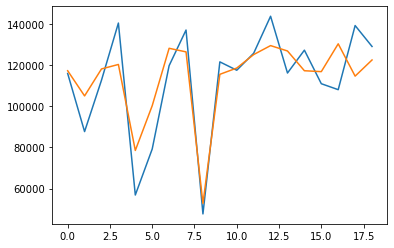

In [15]:

reg = linear_model.LinearRegression()


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.get_params())
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))

print(reg.score(X_test, y_test))
plt.plot(y_test)
plt.plot(y_pred)

Score springt wie vorher R2 Score von um die 0 bis an die 0.75 je nach train_testsplit (bei gesetzem random_state konstant bei 0.75).
Unterschiedliche Scaler oder das Ändern der Parametereinstellungen bei der LinearRegression-Funktion bringen keinen weiteren signifikanten Unterschied.

**Vorhersage Power-Output mit MLP Regressor**
Idee: Vorhersage Power-Output 2021

In [64]:
##DATA-Preparing##
#features: rain_day_192021, temp; labels(ground_truth)= power_day
from sklearn import preprocessing

power_day = power_list_2019 + power_list_2020
rain_day_1920 = rain_day_2019+rain_day_2020
i=0

#Regen + Temperatur 2019 + 2020 (X-Train)
list=[]
for i in range(62,93):
    list.append(i)
    i=i+1
    
features_1920 = temp.copy(deep=True)
features_1920 = features_1920.drop(labels=list, axis=0)
features_1920['rain']=rain_day_1920
features_1920['rain']=rain_day_1920
features_1920=features_1920.drop(columns=['date'], axis=1)

#Regen + Temperatur 2021 (X-Test)
list=[]
for i in range(31,93):
    list.append(i)
    i=i+1

features_21 = temp.copy(deep=True)
features_21 = features_21.drop(labels=list, axis=0)
features_21['rain']=rain_day_2021
features_21=features_21.drop(columns=['date'], axis=1)

X_train = preprocessing.MinMaxScaler().fit_transform(features_1920)
X_test = preprocessing.MinMaxScaler().fit_transform(features_21)
y_train = power_day
y_test = power_list_2021


#MLP Regressor
from sklearn.neural_network import MLPRegressor 

regr = MLPRegressor(random_state=1, max_iter=80, solver='lbfgs', warm_start=True, activation = 'relu', hidden_layer_sizes = (100,), alpha = 100000).fit(X_train, y_train)
print(regr.predict(X_test), regr.get_params())
regr.score(X_test, y_test)

[120889.7648498  119233.49525714 115920.95607182 120613.71991769
 124478.34896723 113988.64154705 107087.5182443  115644.91113971
 125858.57362778 114264.68647916 125858.57362778 113988.64154705
  76776.77467888 120889.7648498   92787.38074126  91959.24594493
 124754.39389934 118957.45032503 120337.67498558 121993.94457824
  94443.65033392  87818.57196328 108743.78783696 111504.23715806
  93339.47060548 120613.71991769  77604.90947521 123650.2141709
 121993.94457824  93339.47060548 107915.65304063] {'activation': 'relu', 'alpha': 100000, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 80, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': True}


0.5682595651580458

Score des MLP Regressors um Power-Output 2021 vorherzugen ist von 52% auf 56% gestiegen durch anpassen vom alpha score und den max_iter.

**MLP Regressor Accuracy Score**
Idee: Power-Output mit Temperatur und Regen vorhersagen 

In [72]:
#features: rain_day_192021, temp; labels(ground_truth)= power_day

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

power_day = power_list_2019 + power_list_2020 + power_list_2021
features = temp.copy(deep=True)
features['rain']=rain_day_192021
features=features.drop(columns=['date'], axis=1)

X = preprocessing.MinMaxScaler().fit_transform(features)
y = power_day



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#MLP Regressor
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs', warm_start=True).fit(X_train, y_train)
predict=regr.predict(X_test).tolist()
print('Prediction\n', predict)
regr.score(X_test, y_test) 

Prediction
 [121755.15785616582, 92092.69917569715, 122002.88714007784, 122622.21034985785, 78263.2213381015, 90709.74719447568, 124851.77390506591, 124356.31533724192, 80337.64231416387, 121259.69928834181, 122126.75178203384, 123984.72141137389, 125223.36783093393, 124480.1799791979, 121755.15785616582, 121631.29321420983, 125999.54765285617, 121011.97000442981, 123241.53355963786]


0.7247923992364851

**MLP Regressor Accuracy Score** Idee: Regenvorhersage mit Temperatur (und Power)

In [66]:
#features: temp, (Power pro Tag); labels(ground_truth)= rain_day_192021

power_day = power_list_2019 + power_list_2020 + power_list_2021

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

features = temp.copy(deep=True)
features['power']=power_day
features=features.drop(columns=['date'], axis=1)


X = preprocessing.MinMaxScaler().fit_transform(features)
y = rain_day_192021

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#MLP Regressor
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs', warm_start=True).fit(X_train, y_train)
regr.score(X_test, y_test) 

0.999190424391629

Score hält sich die meiste Zeit über 60% auf, schwankt jedoch weit aus mehr als beim Classifier. Grund: testsplit

Mit gesetztem random state bei testsplit -> R_2 = ~99.9%
Ohne Power Daten Score bei ~90%.

**MLP Classifier mit Accuracy Score** Idee: Regenvorhersage mit Temperatur (und Power)

In [77]:
#features: temp, (Power pro Tag); labels(ground_truth)= rain_day_192021


from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

power_day = power_list_2019 + power_list_2020 + power_list_2021

features = temp.copy(deep=True)
features['power']=power_day
features=features.drop(columns=['date'], axis=1)

X = features
y = rain_day_192021


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 20, 15), random_state=1, max_iter=50000)
clf.fit(X_train, y_train)
print('Accuracy auf den Trainingsdaten',clf.score(X_train, y_train))
print('Accuracy auf den Testdaten:',clf.score(X_test, y_test))

Accuracy auf den Trainingsdaten 0.7702702702702703
Accuracy auf den Testdaten: 0.7894736842105263


**MLP Classifier mit predict**
Idee: Regenvorhersage des Monats 2021

In [78]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

#power_day = power_list_2019 + power_list_2020
rain_day_1920 = rain_day_2019+rain_day_2020

#Temperatur 2019 + 2020 (X-Train)
i=0
list=[]
for i in range(62,93):
    list.append(i)
    i=i+1
    
features_1920 = temp.copy(deep=True)
features_1920 = features_1920.drop(labels=list, axis=0)
features_1920=features_1920.drop(columns=['date'], axis=1)

#Temperatur 2021 (X-Test)
list=[]
for i in range(31,93):
    list.append(i)
    i=i+1

features_21 = temp.copy(deep=True)
features_21 = features_21.drop(labels=list, axis=0)
features_21=features_21.drop(columns=['date'], axis=1)

X_train = preprocessing.MinMaxScaler().fit_transform(features_1920)
X_test = preprocessing.MinMaxScaler().fit_transform(features_21)
y_train = rain_day_1920
y_test = rain_day_2021

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 20, 15), random_state=1, max_iter=10000)
clf.fit(X_train, y_train)
predict=clf.predict(X_test).tolist()
print('Monat Juli 2021 vorhergesagt:',predict)
print('Monat Juli 2021 aus Datenset:',y_test)
i=0
match=0
for i in range(31):
    if predict[i] == y_test[i]:
        match = match + 1
        i=i+1
print(f'Anzahl der Matches durch die Anzahl der Tage: {match/31:3.2f}')

Monat Juli 2021 vorhergesagt: [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
Monat Juli 2021 aus Datenset: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
Anzahl der Matches durch die Anzahl der Tage: 0.58


In [76]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
rain_list_1920 = rain_list_2019 + rain_list_2020
power_list_1920 = power_list_2019 + power_list_2020
#Regen 2019 2020 (X-Train)
features_rain_1920 = pd.DataFrame(rain_list_1920)

#Regen 2021 (X-Test)
features_rain_21 = pd.DataFrame(rain_list_2021)

X_train = preprocessing.MinMaxScaler().fit_transform(features_rain_1920)
X_test = preprocessing.MinMaxScaler().fit_transform(features_rain_21)
y_train = power_list_1920
y_test = power_list_2021

clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5, 20, 15), random_state=1, max_iter=10000)
clf.fit(X_train, y_train)
#real_input=[[4]] echter Input
predict=clf.predict(X_test).tolist()
print('Monat Juli 2021 vorhergesagt:',predict)
print('Monat Juli 2021 aus Datenset:',y_test)

#Abweichung Vorhersage von Ground Truth
i=0
list_abweichung=[]
for i in range(31):
    abweichung=predict[i]-y_test[i]
    list_abweichung.append(abweichung)
    i=i+1
print("\nListe der Abweichungen:", list_abweichung)

#Abweichung im Durchschnitt
schnitt_abweichung=0
for i in list_abweichung:
    schnitt_abweichung+=i
print(f"Schnittabweichung: {schnitt_abweichung/31} Watt")

Monat Juli 2021 vorhergesagt: [120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 87144.06344126783, 120683.10820800648, 68458.02421408489, 70614.10566337523, 120683.10820800648, 120683.10820800648, 120683.10820800648, 120683.10820800648, 90258.40331246503, 60791.95683883035, 120683.10820800648, 120683.10820800648, 102715.76279725364, 120683.10820800648, 48735.976136499456, 120683.10820800648, 120683.10820800648, 51466.407604077394, 120683.10820800648]
Monat Juli 2021 aus Datenset: [119675, 132449, 95060, 107025, 113129, 123770, 137316, 136099, 124071, 115346, 125286, 114967, 87677, 135673, 78725, 79219, 126434, 133701, 112069, 137387, 95498, 86355, 126147, 125626, 106779, 124601, 56889, 152846, 143659, 75355, 128984]

Liste der Abweichungen: [1008.1082080064807, -11765.89179199352, 25623.10820800648

# Tensorflow fully connected

In [77]:
import tensorflow as tf
from sklearn import preprocessing

model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(1))

#rain_nn = preprocessing.MinMaxScaler().fit_transform(rain_list_1920)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
             loss=tf.keras.losses.MeanSquaredError(),
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [78]:
model.fit(rain_list_1920, power_list_1920, epochs=100, batch_size=8)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 13251102720.0000 - root_mean_squared_error: 115113.4375
Epoch 2/100
8/8 [==============================] - 0s 19ms/step - loss: 13394528256.0000 - root_mean_squared_error: 115734.7344
Epoch 3/100
8/8 [==============================] - 0s 19ms/step - loss: 13014950912.0000 - root_mean_squared_error: 114083.0859
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 13178882048.0000 - root_mean_squared_error: 114799.3125
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 13164747776.0000 - root_mean_squared_error: 114737.7344
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 13014949888.0000 - root_mean_squared_error: 114083.0859
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 12747856896.0000 - root_mean_squared_error: 112906.4062
Epoch 8/100
8/8 [==============================] - 0s 22ms/step - loss: 12764940288.0000 - root_mean_squ

In [79]:
model.evaluate(x=rain_list_2021, y=power_list_2021, verbose=False)

[1142809344.0, 33805.46484375]

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_19 (Dense)             (None, 1000)             